## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [4]:
df = pd.read_csv('F:\YBI Foundation\Dataset-main/Bank data.csv')

In [5]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df = df.set_index('CustomerId')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Encoding of the Features

In [10]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':0,'Germany':1,'Spain':2}},inplace = True)

In [13]:
df.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0


In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace = True)

In [16]:
df.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0


In [17]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [18]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [19]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace = True)

In [20]:
df.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,1,42,2,0.00,0,1,1,101348.88,1
15647311,Hill,608,2,1,41,1,83807.86,0,0,1,112542.58,0


In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [22]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [23]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [24]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [25]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<AxesSubplot:>

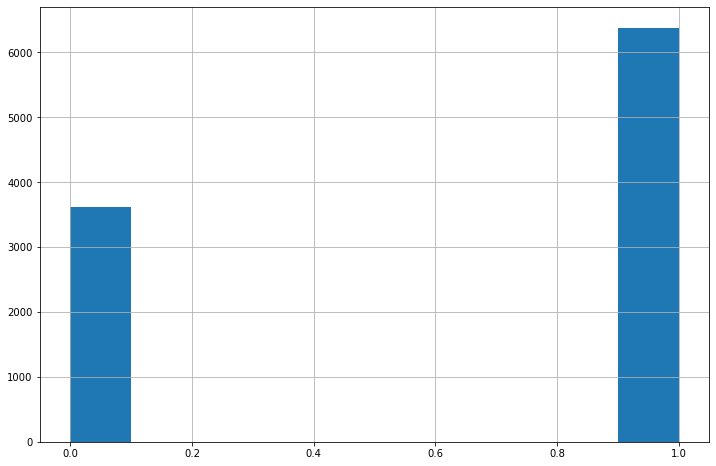

In [26]:
plt.figure(figsize = (12,8))
df['Zero Balance'].hist()

In [27]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

In [28]:
df.groupby(['Churn','Gender']).count()

Surname  CreditScore  Geography   Age  Tenure  Balance  \
Churn Gender                                                           
0     0          4559         4559       4559  4559    4559     4559   
      1          3404         3404       3404  3404    3404     3404   
1     0           898          898        898   898     898      898   
      1          1139         1139       1139  1139    1139     1139   

              Num Of Products  Has Credit Card  Is Active Member  \
Churn Gender                                                       
0     0                  4559             4559              4559   
      1                  3404             3404              3404   
1     0                   898              898               898   
      1                  1139             1139              1139   

              Estimated Salary  Zero Balance  
Churn Gender                                  
0     0                   4559          4559  
      1                   3404          3404  
1     0                    898           898  
      1                   1139          1139

In [29]:
df.groupby(['Churn','Num Of Products']).count()

Surname  CreditScore  Geography  Gender   Age  Tenure  \
Churn Num Of Products                                                          
0     0                   3675         3675       3675    3675  3675    3675   
      1                   4288         4288       4288    4288  4288    4288   
1     0                   1409         1409       1409    1409  1409    1409   
      1                    628          628        628     628   628     628   

                       Balance  Has Credit Card  Is Active Member  \
Churn Num Of Products                                               
0     0                   3675             3675              3675   
      1                   4288             4288              4288   
1     0                   1409             1409              1409   
      1                    628              628               628   

                       Estimated Salary  Zero Balance  
Churn Num Of Products                                  
0     0                            3675          3675  
      1                            4288          4288  
1     0                            1409          1409  
      1                             628           628

## Defining X and Y

In [30]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [31]:
x = df.drop(['Surname','Churn'],axis = 1)

In [32]:
y = df['Churn']

In [33]:
x.shape,y.shape

((10000, 11), (10000,))

In [34]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

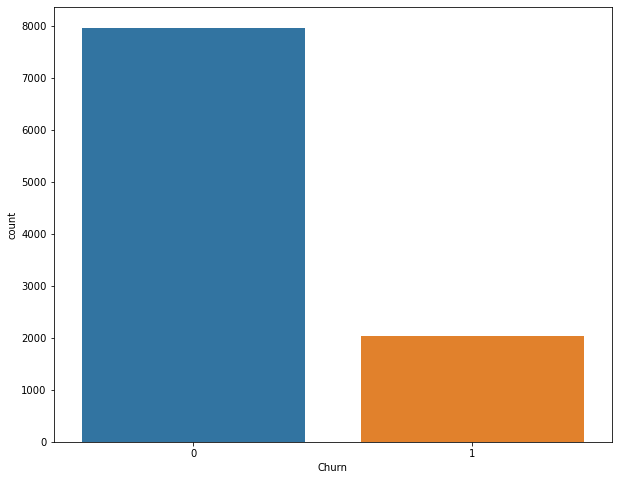

In [35]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Churn',data = df)

## Random Under Sampling

In [37]:
!pip install imblearn

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
rus = RandomUnderSampler(random_state = 192529)

In [40]:
x_rus,y_rus = rus.fit_resample(x,y)

In [41]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [42]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [43]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:>

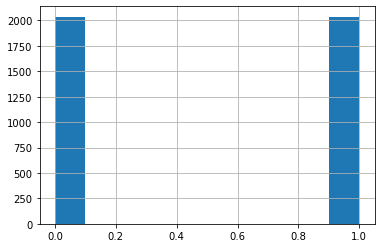

In [44]:
y_rus.hist()

## Random Over Sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
rov = RandomOverSampler(random_state = 192529)

In [47]:
x_rov,y_rov = rov.fit_resample(x,y)

In [48]:
x_rov.shape,y_rov.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [49]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [50]:
y_rov.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<AxesSubplot:>

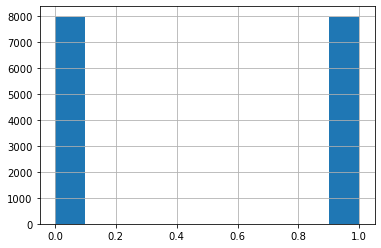

In [51]:
y_rov.hist()

## Splitting the Data for Modelling

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 192529) # Original Data split

In [54]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size = 0.3,random_state = 192529)# Random under sample data split

In [55]:
x_train_rov,x_test_rov,y_train_rov,y_test_rov = train_test_split(x_rov,y_rov,test_size = 0.3,random_state = 192529)# Random Over sample data split

## Standardization 

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

# Standardize the original data

In [58]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [59]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [60]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize the Random under sample data

In [61]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [62]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize the Random Over sample data

In [63]:
x_train_rov[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rov[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [64]:
x_test_rov[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rov[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Importing the ML Model

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

In [67]:
svc.fit(x_train,y_train)

SVC()

In [68]:
y_pred = svc.predict(x_test)

## Checking the Model Accuracy

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
confusion_matrix(y_pred,y_test)

array([[2378,  425],
       [  45,  152]], dtype=int64)

In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2803
           1       0.26      0.77      0.39       197

    accuracy                           0.84      3000
   macro avg       0.62      0.81      0.65      3000
weighted avg       0.93      0.84      0.88      3000



## Random under Sampling  Model

In [72]:
svc_rus = SVC()

In [73]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [74]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [75]:
confusion_matrix(y_pred_rus,y_test_rus)

array([[470, 155],
       [159, 439]], dtype=int64)

In [76]:
print(classification_report(y_pred_rus,y_test_rus))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       625
           1       0.74      0.73      0.74       598

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### Random Over Sampling Model

In [77]:
svc_rov = SVC()

In [78]:
svc_rov.fit(x_train_rov,y_train_rov)

SVC()

In [79]:
y_pred_rov = svc_rov.predict(x_test_rov)

In [80]:
confusion_matrix(y_pred_rov,y_test_rov)

array([[1829,  593],
       [ 532, 1824]], dtype=int64)

In [81]:
print(classification_report(y_pred_rov,y_test_rov))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2422
           1       0.75      0.77      0.76      2356

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



## Hyperparameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = { 'C' : [0.1,1,10],
             'gamma' : [1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [84]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 2,cv= 2)

In [85]:
grid.fit(x_train_rov,y_train_rov)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [86]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [87]:
grid_pred = grid.predict(x_test_rov)

In [88]:
confusion_matrix(grid_pred,y_test_rov)

array([[2014,  101],
       [ 347, 2316]], dtype=int64)

In [89]:
print(classification_report(y_test_rov,grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2361
           1       0.87      0.96      0.91      2417

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



## After trying the model on the original and over and under sampling data, we came to conclude that the random over sample data have the high accuracy with the help of Hyperparameter tuning and the recall is 96 percentage, so we can say that the SVC Model for this problem statement have worked very fine